In [1]:
import pandas as pd
import numpy as np


In [2]:
training = pd.read_csv('mnist_train.csv', header=None)
training_labels = training.iloc[0:60000, 0]
training_images = training.iloc[0:60000, 1:]

test = pd.read_csv('mnist_test.csv', header=None)
test_labels = test.iloc[0:10000, 0]
test_images = test.iloc[0:10000, 1:]

## Linear Discriminant Analysis

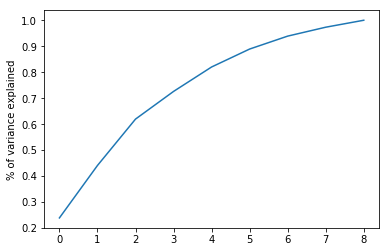

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import discriminant_analysis
from sklearn import datasets

COMPONENT_NUM = 35
## LDA 
lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=COMPONENT_NUM) #Finds enough components
lda.fit_transform(training_images,training_labels)

var_explained = lda.explained_variance_ratio_.cumsum()
plt.plot(var_explained)
plt.ylabel('% of variance explained')

#plt.plot(lda.explained_variance_ratio_)


Plot shows that 8 components are enough for LDA

In [15]:
len(var_explained)


9

In [22]:
## LDA decomposition with optimal number of PCs
#decompose train data
lda_training = discriminant_analysis.LinearDiscriminantAnalysis(n_components=len(var_explained)-1) 
lda_training.fit(training_images,training_labels)
LDAtrain = pd.DataFrame(lda_training.transform(training_images))
LDAtrain['label'] = training_labels

LDAtest = pd.DataFrame(lda_training.transform(test_images))
LDAtest['label'] = test_labels

### 25 Hidden Perceptrons

In [23]:
from sklearn.neural_network import MLPClassifier
y = LDAtrain['label'][0:60000]
X=LDAtrain.drop('label', axis=1)[0:60000]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(25,), random_state=1)
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [25]:
from sklearn import  metrics
#accuracy and confusion matrix
predicted = clf.predict(LDAtest.drop('label', axis=1)[0:10000])
expected = LDAtest['label'][0:10000]

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False):
             precision    recall  f1-score   support

          0       0.94      0.97      0.95       980
          1       0.96      0.97      0.97      1135
          2       0.92      0.89      0.91      1032
          3       0.86      0.88      0.87      1010
          4       0.89      0.92      0.91       982
          5       0.85      0.84      0.85       892
          6       0.94      0.94      0.94       958
          7       0.92      0.91      0.92      1028
          8       0.85      0.85      0.85       974
 

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, expected)

0.90580000000000005

### 50 Hidden Perceptrons

In [28]:
from sklearn.neural_network import MLPClassifier
y = LDAtrain['label'][0:60000]
X=LDAtrain.drop('label', axis=1)[0:60000]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(50,), random_state=1)
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [29]:
from sklearn import  metrics
#accuracy and confusion matrix
predicted = clf.predict(LDAtest.drop('label', axis=1)[0:10000])
expected = LDAtest['label'][0:10000]

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False):
             precision    recall  f1-score   support

          0       0.96      0.97      0.96       980
          1       0.97      0.98      0.97      1135
          2       0.91      0.91      0.91      1032
          3       0.88      0.89      0.88      1010
          4       0.90      0.93      0.91       982
          5       0.86      0.85      0.86       892
          6       0.94      0.95      0.94       958
          7       0.92      0.91      0.92      1028
          8       0.85      0.84      0.85       974
 

In [30]:
accuracy_score(predicted, expected)

0.91080000000000005

### 75 Hidden Perceptrons

In [31]:
from sklearn.neural_network import MLPClassifier
y = LDAtrain['label'][0:60000]
X=LDAtrain.drop('label', axis=1)[0:60000]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(75,), random_state=1)
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(75,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [32]:
from sklearn import  metrics
#accuracy and confusion matrix
predicted = clf.predict(LDAtest.drop('label', axis=1)[0:10000])
expected = LDAtest['label'][0:10000]

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(75,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False):
             precision    recall  f1-score   support

          0       0.96      0.97      0.96       980
          1       0.96      0.97      0.97      1135
          2       0.91      0.90      0.91      1032
          3       0.88      0.89      0.89      1010
          4       0.91      0.92      0.91       982
          5       0.87      0.86      0.86       892
          6       0.94      0.94      0.94       958
          7       0.91      0.92      0.91      1028
          8       0.86      0.85      0.86       974
 

In [33]:
accuracy_score(predicted, expected)

0.91169999999999995

### 100 Hidden Perceptrons

In [34]:
from sklearn.neural_network import MLPClassifier
y = LDAtrain['label'][0:60000]
X=LDAtrain.drop('label', axis=1)[0:60000]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,), random_state=1)
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [35]:
from sklearn import  metrics
#accuracy and confusion matrix
predicted = clf.predict(LDAtest.drop('label', axis=1)[0:10000])
expected = LDAtest['label'][0:10000]

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False):
             precision    recall  f1-score   support

          0       0.96      0.97      0.96       980
          1       0.97      0.97      0.97      1135
          2       0.91      0.92      0.92      1032
          3       0.88      0.89      0.89      1010
          4       0.91      0.93      0.92       982
          5       0.87      0.86      0.86       892
          6       0.95      0.94      0.94       958
          7       0.91      0.92      0.91      1028
          8       0.87      0.86      0.87       974


In [36]:
accuracy_score(predicted, expected)

0.91349999999999998